<a href="https://colab.research.google.com/github/1234-ad/1234-ad/blob/main/Insurance_Customer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install required libraries

In [8]:
# Install kmodes which includes K-Prototypes
!pip install kmodes

Import libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style="whitegrid")

Load Dataset

In [10]:
# Load dataset from GitHub
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url)

# View first few records
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Explore Dataset (EDA)

In [11]:
# Dataset information
print("Basic Info:")
df.info()

# Check for null values
print("\nMissing Values:")
print(df.isnull().sum())

# Statistical summary of numerical columns
print("\nSummary Statistics:")
df.describe()

# Check unique values in categorical columns
print("\nUnique values in 'sex':", df['sex'].unique())
print("Unique values in 'smoker':", df['smoker'].unique())
print("Unique values in 'region':", df['region'].unique())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Summary Statistics:

Unique values in 'sex': ['female' 'male']
Unique values in 'smoker': ['yes' 'no']
Unique values in 'region': ['southwest' 'southeast' 'northwest' 'northeast']


Visualize Relationships

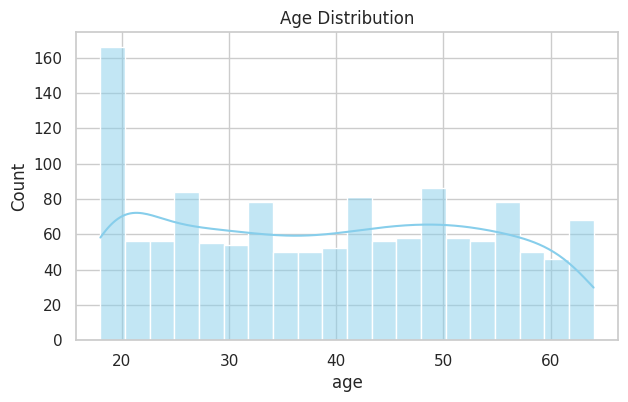

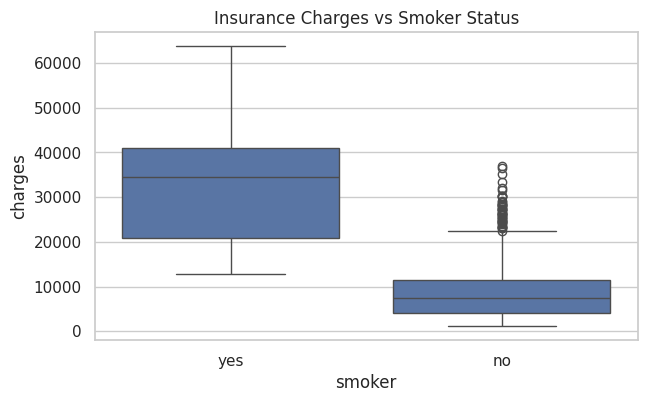

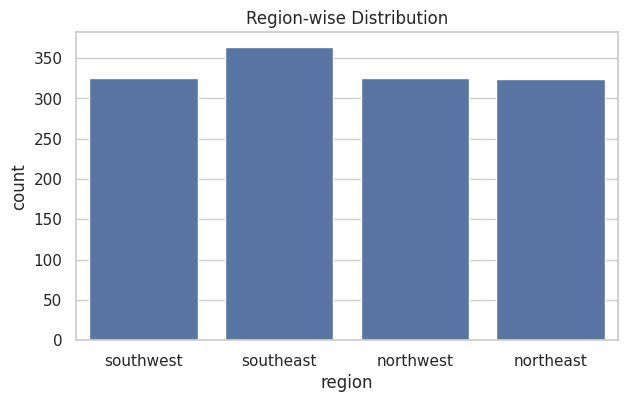

In [12]:
# Age distribution
plt.figure(figsize=(7,4))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()

# Charges by smoker
plt.figure(figsize=(7,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Insurance Charges vs Smoker Status")
plt.show()

# Region count
plt.figure(figsize=(7,4))
sns.countplot(x='region', data=df)
plt.title("Region-wise Distribution")
plt.show()

Prepare Data for K-Prototypes

In [13]:
# Copy dataset
data = df.copy()

# Ensure all categorical columns are strings
data['sex'] = data['sex'].astype(str)
data['smoker'] = data['smoker'].astype(str)
data['region'] = data['region'].astype(str)

# Convert to numpy array
data_matrix = data.to_numpy()

# Categorical column indexes (sex=1, smoker=4, region=5)
categorical_columns = [1, 4, 5]

Finding Optimal K

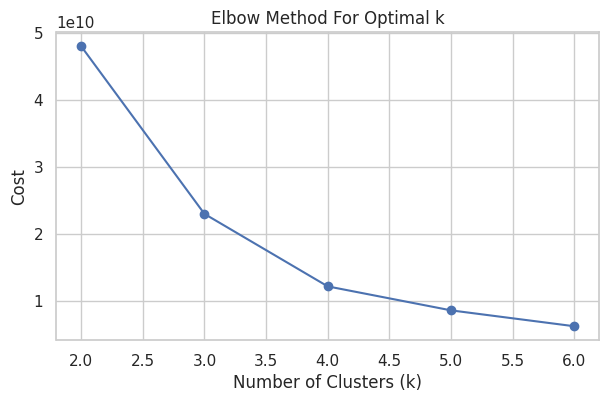

In [14]:
costs = []
K = range(2, 7)
for num_clusters in K:
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao', verbose=0, random_state=42)
    clusters = kproto.fit_predict(data_matrix, categorical=categorical_columns)
    costs.append(kproto.cost_)

plt.figure(figsize=(7,4))
plt.plot(K, costs, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Apply K-Prototypes Clustering

In [15]:
# Apply K-Prototypes with optimal k (say 4)
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=1, random_state=42)
clusters = kproto.fit_predict(data_matrix, categorical=categorical_columns)

# Add cluster column to original DataFrame
df['Cluster'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 334, ncost: 21135052025.10814
Run: 1, iteration: 2/100, moves: 187, ncost: 15321717972.15987
Run: 1, iteration: 3/100, moves: 153, ncost: 12627646973.447493
Run: 1, iteration: 4/100, moves: 77, ncost: 12194443253.45919
Run: 1, iteration: 5/100, moves: 35, ncost: 12135100751.297768
Run: 1, iteration: 6/100, moves: 10, ncost: 12128911121.633171
Run: 1, iteration: 7/100, moves: 2, ncost: 12128710407.78944
Run: 1, iteration: 8/100, moves: 0, ncost: 12128710407.78944
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 191, ncost: 19326619615.919147
Run: 2, iteration: 2/100, moves: 168, ncost: 15183311037.794827
Run: 2, iteration: 3/100, moves: 154, ncost: 12627646973.447493
Run: 2, iteration: 4/100, moves: 77, ncost: 12194443253.45919
Run: 2, it

Analyze Cluster Profiles

In [16]:
# Count of records in each cluster
print("Number of records per cluster:")
print(df['Cluster'].value_counts())

# Mean values per cluster
print("\nAverage values per cluster:")
print(df.groupby('Cluster')[['age', 'bmi', 'children', 'charges']].mean())

# Mode of categorical per cluster
print("\nMost common region per cluster:")
print(df.groupby('Cluster')['region'].agg(lambda x: x.value_counts().index[0]))

Number of records per cluster:
Cluster
0    564
2    443
3    176
1    155
Name: count, dtype: int64

Average values per cluster:
               age        bmi  children       charges
Cluster                                              
0        29.322695  30.099167  1.008865   4232.872628
1        39.548387  35.045000  1.135484  41224.580772
2        50.939052  30.841219  1.139955  11318.896650
3        41.051136  28.165114  1.221591  22525.020416

Most common region per cluster:
Cluster
0    southeast
1    southeast
2    northeast
3    southeast
Name: region, dtype: object


Visualize Cluster Insights

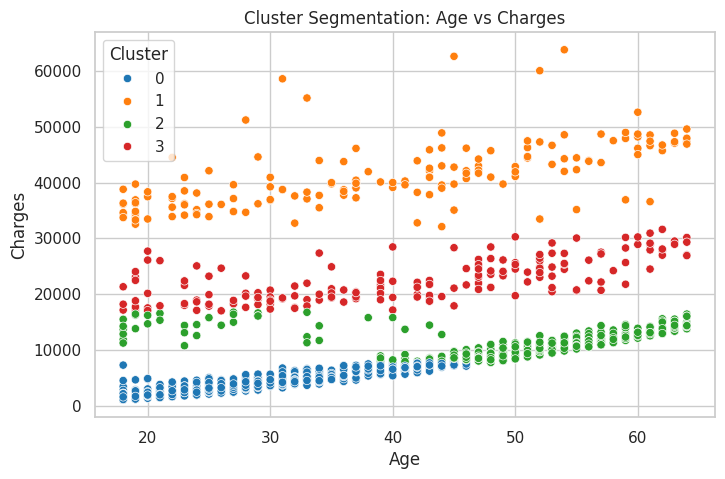

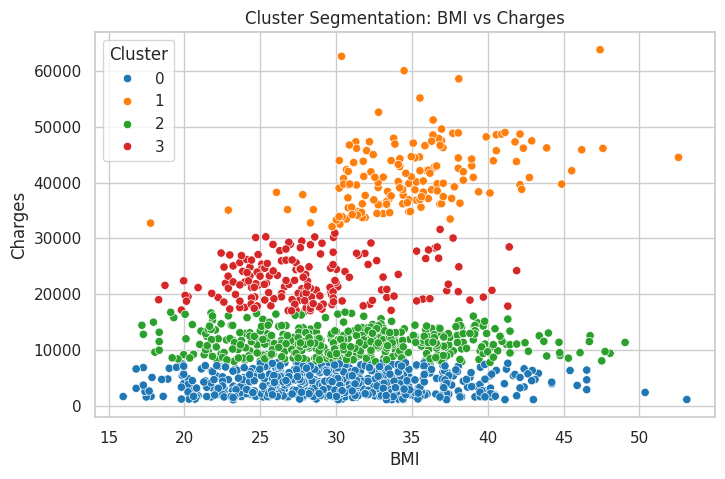

In [17]:
# Charges vs Age by Cluster
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='charges', hue='Cluster', palette='tab10')
plt.title("Cluster Segmentation: Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(title='Cluster')
plt.show()

# Charges vs BMI by Cluster
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='bmi', y='charges', hue='Cluster', palette='tab10')
plt.title("Cluster Segmentation: BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend(title='Cluster')
plt.show()

This is the complete project.